# IMPORTING DATA INTO MYSQL DATABASE USING PYTHON

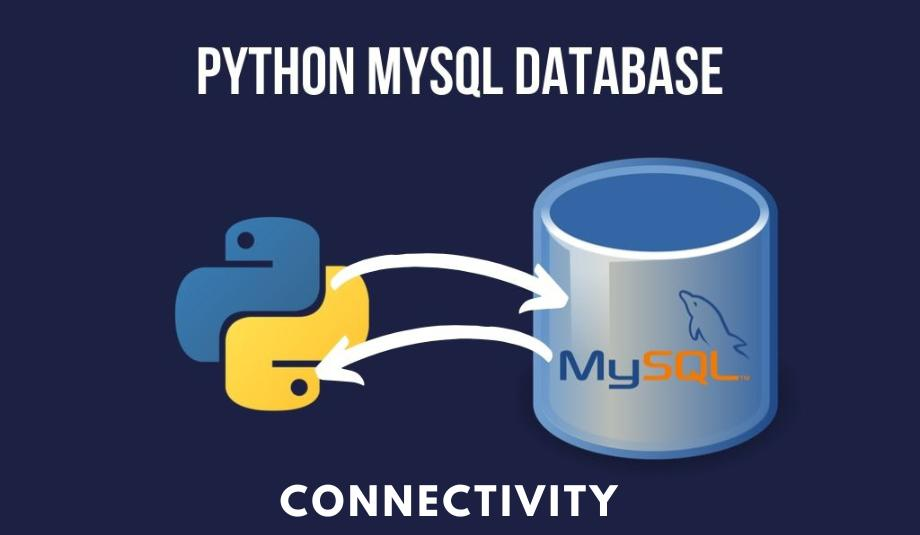

There is a need to pip install some packages for the seamless data import into MySQL which are:
* pandas
* openpyxl 
* mysql-connector-python

To do that the next line of code handles that

In [1]:
# pip install mysql-connector-python

We will be importing five (5) Data into our Schema in the **GlobalMartSales Database** which are:
* Customers
* Dates
* Products
* Orders
* Stores

Now we can carry on with the Data importing.

In [2]:
# Required Libraries
import pandas as pd
import mysql.connector

# Step 1: Load the Excel file without altering datetime format
df = pd.read_excel("structured_Customers.xlsx")  # Ensure this file is in your current working directory

# Step 2: Connect to MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Ayobami12345',
    database='globalmartsales'
)
cursor = conn.cursor()

# Step 3: Insert data row-by-row (preserve datetime format)
# Insert data with correct column names (with backticks)
for _, row in df.iterrows():
    sql = """
    INSERT INTO Customers (
        `Full Name`, `Date of Birth`, Company, Email, Address, Country,
        `Country Code`, Telephone, `Join Date`, `User UUID`
    ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """
    values = (
        row['Full Name'], row['Date of Birth'], row['Company'], row['Email'],
        row['Address'], row['Country'], row['Country Code'], row['Telephone'],
        row['Join Date'], row['User UUID']
    )
    try:
        cursor.execute(sql, values)
    except Exception as e:
        print(f" Error inserting row: {e}")

conn.commit()
cursor.close()
conn.close()

print(" Data inserted successfully into Customers table.")

 Data inserted successfully into Customers table.


In [3]:
import pandas as pd
import mysql.connector

# Load Excel, force convert all date columns using Excel's format
df = pd.read_excel("structured_Dates.xlsx", engine='openpyxl')

# Fix Excel serial dates by parsing explicitly
date_columns = ['Date', 'StartOfYear', 'StartOfQuarter', 'StartOfMonth', 'StartOfWeek']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce').dt.date  # Convert to date only

# MySQL connection
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Ayobami12345',
    database='globalmartsales'
)
cursor = conn.cursor()

# Insert data row-by-row
for _, row in df.iterrows():
    sql = """
    INSERT INTO Dates (
        `Date`, `StartOfYear`, `StartOfQuarter`, `StartOfMonth`, `StartOfWeek`,
        `Quarter`, `MonthNumber`, `Year`, `DayOfTheWeek`, `MonthName`
    ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """
    values = (
        row['Date'], row['StartOfYear'], row['StartOfQuarter'], row['StartOfMonth'],
        row['StartOfWeek'], row['Quarter'], row['MonthNumber'], row['Year'],
        row['DayOfTheWeek'], row['MonthName']
    )
    try:
        cursor.execute(sql, values)
    except Exception as e:
        print(f" Error inserting row: {e}")

conn.commit()
cursor.close()
conn.close()

print(" All dates converted & inserted successfully into `Dates` table.")


 All dates converted & inserted successfully into `Dates` table.


In [4]:
import pandas as pd
import mysql.connector

# Load the Excel file
products_df = pd.read_excel("structured_Products.xlsx")

# Optional: convert date_added to proper date format
products_df['date_added'] = pd.to_datetime(products_df['date_added'], errors='coerce').dt.date

# Connect to MySQL
conn = mysql.connector.connect(
    host='localhost',
    user='root',     # <-- Replace with your MySQL username
    password='Ayobami12345', # <-- Replace with your MySQL password
    database='globalmartsales'
)
cursor = conn.cursor()

# Insert data row-by-row
for _, row in products_df.iterrows():
    sql = """
    INSERT INTO Products (
        `Description`, `Sale Price`, `Category`, `EAN`, `date_added`, `product_uuid`,
        `Availability`, `Product Code`, `Cost Price`, `Weight`, `Weight Kilograms`,
        `Clean weight values`, `Weight Units`, `Profit Per Item`
    ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """
    values = (
        row['Description'], row['Sale Price'], row['Category'], row['EAN'], row['date_added'],
        row['product_uuid'], row['Availability'], row['Product Code'], row['Cost Price'],
        row['Weight'], row['Weight Kilograms'], row['Clean weight values'],
        row['Weight Units'], row['Profit Per Item']
    )
    try:
        cursor.execute(sql, values)
    except Exception as e:
        print(f" Error inserting row: {e}")

# Finalise
conn.commit()
cursor.close()
conn.close()

print(" Products data inserted successfully into MySQL.")


 Error inserting row: 1054 (42S22): Unknown column 'nan' in 'field list'
 Products data inserted successfully into MySQL.


In [5]:
import pandas as pd
import mysql.connector

# Load and clean the Excel file
orders_df = pd.read_excel("structured_Orders.xlsx")
orders_df = orders_df.loc[:, ~orders_df.columns.str.contains('^Unnamed|nan', na=True)]

# Convert date and time fields to proper formats
orders_df['Order Date'] = pd.to_datetime(orders_df['Order Date'], errors='coerce').dt.date
orders_df['Shipping Date'] = pd.to_datetime(orders_df['Shipping Date'], errors='coerce').dt.date
orders_df['Order Time'] = pd.to_datetime(orders_df['Order Time'], errors='coerce').dt.time
orders_df['Shipping Time'] = pd.to_datetime(orders_df['Shipping Time'], errors='coerce').dt.time

# Connect to MySQL
conn = mysql.connector.connect(
    host='localhost',
    user='root',     # <-- Replace this
    password='Ayobami12345', # <-- Replace this
    database='globalmartsales'
)
cursor = conn.cursor()

# Insert each row
for _, row in orders_df.iterrows():
    sql = """
    INSERT INTO Orders (
        `User ID`, `Store Code`, `Product Code`, `Product Quantity`,
        `Order Date`, `Order Time`, `Shipping Date`, `Shipping Time`
    ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
    """
    values = (
        row['User ID'], row['Store Code'], row['Product Code'], row['Product Quantity'],
        row['Order Date'], row['Order Time'], row['Shipping Date'], row['Shipping Time']
    )
    try:
        cursor.execute(sql, values)
    except Exception as e:
        print(f" Error inserting row: {e}")

# Finalise
conn.commit()
cursor.close()
conn.close()

print(" Orders data inserted successfully into MySQL.")


 Orders data inserted successfully into MySQL.


In [6]:
import pandas as pd
import mysql.connector

# Load and clean the Excel file
stores_df = pd.read_excel("structured_Stores.xlsx")
stores_df = stores_df.loc[:, ~stores_df.columns.str.contains('^Unnamed|nan', na=True)]
stores_df['Date Opened'] = pd.to_datetime(stores_df['Date Opened'], errors='coerce').dt.date

# Connect to MySQL
db = mysql.connector.connect(
    host='localhost',
    user='root',       # <-- Replace this
    password='Ayobami12345',   # <-- Replace this
    database='globalmartsales'
)
cursor = db.cursor()

# Insert each row
for _, row in stores_df.iterrows():
    sql = """
    INSERT INTO Stores (
        `Store Code`, `Staff Numbers`, `Date Opened`, `Store Type`, `Country Code`,
        `World Region`, `Country Region`, `Latitude`, `Longitude`, `Country`, `Full Region`
    ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """
    values = (
        row['Store Code'], row['Staff Numbers'], row['Date Opened'], row['Store Type'], row['Country Code'],
        row['World Region'], row['Country Region'], row['Latitude'], row['Longitude'], row['Country'], row['Full Region']
    )
    try:
        cursor.execute(sql, values)
    except Exception as e:
        print(f" Error inserting row: {e}")

#  Finalise
db.commit()
cursor.close()
db.close()

print(" Stores data inserted successfully into MySQL.")

 Error inserting row: 1054 (42S22): Unknown column 'nan' in 'field list'
 Error inserting row: 1054 (42S22): Unknown column 'nan' in 'field list'
 Error inserting row: 1054 (42S22): Unknown column 'nan' in 'field list'
 Error inserting row: 1054 (42S22): Unknown column 'nan' in 'field list'
 Error inserting row: 1054 (42S22): Unknown column 'nan' in 'field list'
 Stores data inserted successfully into MySQL.


Now that we are done with populating our schema in the preferred Database, we proceed to connecting MySQL and Power BI together.